# Лабораторная работа 1

In [553]:
# !pip install -r requierments.txt

In [554]:

# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, get_scorer
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.base import clone
# import numpy as np
# import matplotlib.pyplot as plt
# import optuna
# from catboost import CatBoostRegressor
# import time

## Загрузка данных


In [555]:

# data = fetch_california_housing(as_frame=True)
# df = data.frame.copy()
# X = data.data.copy()
# y = data.target.copy()

# print(df.shape)
# df.head()

## Выборка

In [556]:

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Модели и метрики


In [557]:
# def metrics(y_true, y_pred):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = root_mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [558]:
# pipeline_lr = Pipeline([
#     ("scaler", StandardScaler()),
#     ("model", LinearRegression())
# ])

# pipeline_lr.fit(X_train, y_train)
# pred_lr = pipeline_lr.predict(X_test)
# metrics_lr = metrics(y_test, pred_lr)

# rf = RandomForestRegressor(
#     n_estimators=200, random_state=42, n_jobs=-1
# )

# rf.fit(X_train, y_train)
# pred_rf = rf.predict(X_test)
# metrics_rf = metrics(y_test, pred_rf)

# print("LinearRegression:", metrics_lr)
# print("RandomForestRegressor:", metrics_rf)

## Графики остатков

In [559]:
# def pred_vs_actual_plot(y_true, y_pred, title):
#     plt.figure()
#     plt.scatter(y_true, y_pred, alpha=0.5)
#     plt.xlabel("Actual")
#     plt.ylabel("Predicted")
#     plt.title(title)
#     plt.show()

# def residuals_vs_pred_plot(y_true, y_pred, title):
#     plt.figure()
#     plt.scatter(y_pred, y_true - y_pred, alpha=0.5)
#     plt.xlabel("Predicted")
#     plt.ylabel("Residuals")
#     plt.title(title)
#     plt.show()

In [560]:
# pred_vs_actual_plot(y_test.values, pred_lr,
#                     title="Predicted vs Actual Plot for LinearRegression")
# residuals_vs_pred_plot(y_test.values, pred_lr,
#                        title="Residuals vs Predicted Plot for LinearRegression")

# pred_vs_actual_plot(y_test.values, pred_rf,
#                     title="Predicted vs Actual Plot for RandomForest")
# residuals_vs_pred_plot(y_test.values, pred_rf,
#                        title="Residuals vs Predicted Plot for RandomForest")

## Подбор гиперпараметров

In [561]:
# def rmse(y_true, y_pred):
#     y_true = np.asarray(y_true, dtype=float)
#     y_pred = np.asarray(y_pred, dtype=float)
#     return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

In [562]:
# def objective_rf(trial):
#     n_estimators = trial.suggest_int("n_estimators", 100, 600, step=50)
#     max_depth = trial.suggest_int("max_depth", 3, 30)
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
#     min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

#     base_model = RandomForestRegressor(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42,
#         n_jobs=-1
#     )

#     crossvalidation = KFold(n_splits=3, shuffle=True, random_state=42)
#     fold_scores = []

#     indexes = np.arange(len(X_train))

#     for fold_id, (train, valid) in enumerate(crossvalidation.split(indexes)):
#         model = clone(base_model)

#         X_tr = X_train.iloc[train]
#         y_tr = y_train.iloc[train]
#         X_vl = X_train.iloc[valid]
#         y_vl = y_train.iloc[valid]

#         try:
#             model.fit(X_tr, y_tr)
#             y_pr = model.predict(X_vl)
#             score_rmse = rmse(y_vl, y_pr)
#         except Exception as e:
#             print(f"trial={trial.number} | fold {fold_id} error: {e}")
#             score_rmse = float("inf")

#         fold_scores.append(score_rmse)

#         print(f"trial={trial.number} | fold {fold_id}: RMSE={score_rmse}")

#     mean_rmse = float(np.mean(fold_scores)) if len(
#         fold_scores) else float("inf")
#     print(f"trial={trial.number} | mean RMSE={mean_rmse}")
#     return -mean_rmse

In [563]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective_rf, n_trials=30)

# print("Best params:", study.best_params)
# print("Best (neg-RMSE):", study.best_value)

## Фабрика

In [564]:
# def gen_objective(estimator_class, grid, X_train, y_train,
#                   *, cv=3, scorer="neg_root_mean_squared_error",
#                   fit_params=None, random_state=42, n_jobs=-1, verbose=True):
#     fit_params = {} if fit_params is None else dict(fit_params)

#     if not isinstance(grid, dict) or not grid:
#         raise ValueError(
#             "grid must be not empty dict ({param: (type, ...)})")

#     def suggest_param(trial, name, spec):
#         if not isinstance(spec, (tuple, list)) or not spec:
#             raise ValueError(f"Error spec {name}: {spec}")
#         ptype = spec[0]
#         if ptype == "int":
#             low, high = spec[1], spec[2]
#             step = spec[3] if len(spec) > 3 else 1
#             return trial.suggest_int(name, int(low), int(high), step=int(step))
#         elif ptype == "float":
#             low, high = float(spec[1]), float(spec[2])
#             log = bool(spec[3]) if len(spec) > 3 else False
#             return trial.suggest_float(name, low, high, log=log)
#         elif ptype == "categorical":
#             choices = list(spec[1])
#             return trial.suggest_categorical(name, choices)
#         else:
#             raise ValueError(
#                 f"Error space type {ptype} for {name}")

#     if isinstance(scorer, str):
#         try:
#             scorer_obj = get_scorer(scorer)
#         except Exception:
#             if verbose:
#                 print(
#                     f"Error scorer={scorer} | used=neg_root_mean_squared_error")
#             scorer_obj = get_scorer("neg_root_mean_squared_error")
#     else:
#         scorer_obj = scorer

#     idx = np.arange(len(X_train))

#     def objective(trial):
#         t0 = time.time()

#         params = {name: suggest_param(trial, name, spec)
#                   for name, spec in grid.items()}

#         try:
#             probe = estimator_class()
#             base_params = getattr(probe, "get_params", lambda: {})()
#         except Exception:
#             base_params = {}

#         model_kwargs = {}
#         if "random_state" in base_params:
#             model_kwargs["random_state"] = random_state
#         if "n_jobs" in base_params:
#             model_kwargs["n_jobs"] = n_jobs

#         model = estimator_class(**model_kwargs, **params)

#         kf = KFold(n_splits=cv, shuffle=True, random_state=42)
#         fold_scores = []

#         for fold_id, (tr_idx, vl_idx) in enumerate(kf.split(idx), start=1):
#             m = clone(model)
#             X_tr = X_train.iloc[tr_idx]
#             y_tr = y_train.iloc[tr_idx]
#             X_vl = X_train.iloc[vl_idx]
#             y_vl = y_train.iloc[vl_idx]

#             try:
#                 m.fit(X_tr, y_tr, **fit_params)
#                 s = scorer_obj(m, X_vl, y_vl)
#                 s = float(s)
#                 if not np.isfinite(s):
#                     if verbose:
#                         print(
#                             f"trial={trial.number} | fold {fold_id}: score is not finite, set to -1e12")
#                     s = -1e12
#             except Exception as e:
#                 if verbose:
#                     print(
#                         f"trial={trial.number} | fold {fold_id} error: {e}")
#                 s = -1e12

#             fold_scores.append(s)

#             if verbose:
#                 print(f"trial {trial.number} | fold {fold_id} score={s}")

#         mean_score = float(np.mean(fold_scores)) if fold_scores else -1e12
#         if not np.isfinite(mean_score):
#             mean_score = -1e12

#         if verbose:
#             dt = time.time() - t0
#             print(
#                 f"trial={trial.number} | mean_score={mean_score} | time={dt} | params={params}")

#         return mean_score

#     return objective

In [565]:
# from catboost import CatBoostRegressor
# import optuna

# catboost_grid = {
#     "depth": ("int", 4, 10),
#     "learning_rate": ("float", 1e-3, 0.3, True),
#     "l2_leaf_reg": ("float", 1e-2, 10.0, True),
#     "iterations": ("int", 200, 1500, 100),
# }

# objective_cb = gen_objective(
#     CatBoostRegressor,
#     catboost_grid,
#     X_train,
#     y_train,
#     cv=3,
#     scorer="neg_root_mean_squared_error",
#     fit_params={"verbose": False},
#     random_state=42,
#     n_jobs=-1,
#     verbose=True
# )

# study_cb = optuna.create_study(direction="maximize")
# study_cb.optimize(objective_cb, n_trials=30)

# print("Best CatBoost params:", study_cb.best_params)
# print("Best CV score (neg-RMSE):", study_cb.best_value)

# best_cb = CatBoostRegressor(
#     **study_cb.best_params,
#     random_state=42,
#     verbose=False
# )
# best_cb.fit(X_train, y_train)

# pred_best_cb = best_cb.predict(X_test)

# metrics(y_test, pred_best_cb)

# pred_vs_actual_plot(
#     y_test.values, pred_best_cb,
#     title="Predicted vs Actual (Best CatBoost)"
# )
# residuals_vs_pred_plot(
#     y_test.values, pred_best_cb,
#     title="Residuals vs Predicted (Best CatBoost)"
# )

# Лабораторная работа 2

Базовая версия Python: 3.14.0

In [566]:
# pip install -r requierments.txt

In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)

In [568]:
df = pd.read_csv("portal_data.csv", encoding="utf-8", sep="|")
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

`Скорость перехода через портал`, `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` сейчас имеют тип **object**, их нужно преобразовать в численный тип данных.

In [570]:
cols = [
    "Скорость перехода через портал",
    "Температура выдоха Истока",
    "Давление вдоха Истока",
    "Древний Ветер",
]

df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

| **№** | **Признак** | **Описание** | **Тип данных признака** |
| ------ | ---- | ---- | ---- |
| **1** | Вектор Мощи | Позиция магического механизма, управляющего режимом портала | Вещественный |
| **2** | Скорость перехода через портал | Скорость перемещения объекта при прохождении портала | Вещественный |
| **3** | Приток Силы Потока | Значение магического потока, питающего портал | Вещественный |
| **4** | Ритм магического ядра | Частота работы магического ядра портала | Вещественный |
| **5** | Поток Энергий | Интенсивность энергообмена в магическом контуре | Вещественный |
| **6** | Сила Левого Потока | Интенсивность левого энергетического канала | Вещественный |
| **7** | Сила Правого Потока | Интенсивность правого энергетического канала | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии в ядре портала | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха на входе магического источника | Вещественный |
| **10** | Температура выдоха Истока | Температура воздуха на выходе магического источника | Вещественный |
| **11** | Приток давления Выдоха Истока | Поток давления, создаваемый в процессе "выдоха" Истока | Вещественный |
| **12** | Давление выдоха Истока | Давление на выходе магического источника | Вещественный |
| **13** | Давление вдоха Истока | Давление на входе магического источника | Вещественный |
| **14** | Древний Ветер | Дополнительный параметр магического окружения | Вещественный |
| **15** | Печать Чародея | Управляющий параметр контроля портала | Вещественный |
| **16** | Эмульсия Истока | Количество магического горючего/эмульсии | Вещественный |
| **17** | Дыхание Истока | Коэффициент угасания / дыхания энергии | Вещественный |
| **18** | Гармония Бессмертия | Показатель состояния портала, целевая переменная | Вещественный |
| **19** | Тип Вектора Мощи | Категориальный тип режима, связанный с Вектором Мощи | Категориальный |
| **20** | Номер пометки | Уникальный идентификатор записи | Целочисленный |


Целевым значением выступает признак:
"Гармония Бессмертия";

In [571]:
df.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Номер пометки
count,11934.000000,10731.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,2387.000000,11934.000000,2439.000000,11934.000000,2387.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934.000000
mean,5.166667,7.721490,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,646.092576,2.352963,1.394603,12.297123,1.029413,33.641261,0.662440,0.97500,0.9875,5966.500000
std,2.626388,3.993642,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,71.394305,1.084770,0.000000,5.337448,0.010217,25.841363,0.507132,0.01472,0.0075,3445.193391
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,542.994000,1.093000,1.394603,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750,0.000000
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,579.362000,1.389000,1.394603,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810,2983.250000
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,636.963000,2.083000,1.394603,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875,5966.500000
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,692.152000,2.981000,1.394603,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940,8949.750000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,788.433000,4.560000,1.394603,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000,11933.000000


`Температура вдоха Истока` имеет одно и то же значение во всех строках признака, поэтому имеет смысл удалить данный признак.

In [572]:
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,NaN,5.947,NaN,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,NaN,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,NaN,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,NaN,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


In [573]:
df = df.replace({"-": np.nan, "Не определено": np.nan})
df.isna().sum()

Вектор Мощи                          0
Скорость перехода через портал    1203
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура вдоха Истока             0
Температура выдоха Истока         9547
Приток давления Выдоха Истока        0
Давление вдоха Истока             9495
Давление выдоха Истока               0
Древний Ветер                     9547
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Гармония Бессмертия                  0
Тип Вектора Мощи                     0
Номер пометки                        0
dtype: int64

В признаках: `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` - почти полностью отсутствуют данные, поэтому их лучше полностью удалить.

`Номер пометки` не имеет смысла, так как является простым номером строки.

`Тип Вектора Мощи` - категориальный признак, очень схожий со значениями числового признака `Вектор Мощи`, далее необходимо будет проверить работу модели с данным признаком и без:
* с признаком `Тип Вектора Мощи`;
* без признака `Тип Вектора Мощи`.

In [574]:
drop_cols = [
    "Температура вдоха Истока",
    "Температура выдоха Истока",
    "Давление вдоха Истока",
    "Древний Ветер",
    "Номер пометки",
]

df = df.drop(columns=drop_cols, errors="ignore")

In [575]:
X = df.drop(columns=["Гармония Бессмертия"])
y = df["Гармония Бессмертия"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

len(X_train), len(X_test)

(9547, 2387)

# Лабораторная работа 3

In [576]:
X_train.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока
count,9547.000000,8586.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.00000,9547.000000,9547.000000
mean,5.157165,7.715162,27189.342424,223.477312,8196.968701,226.834525,226.834525,734.909839,2.349972,12.281358,33.59335,0.661169,0.975062
std,2.629660,4.000770,22168.866459,81.105784,1092.544520,200.675530,200.675530,173.868978,1.085541,5.340778,25.85155,0.507523,0.014734
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,1.093000,5.828000,0.00000,0.068000,0.950000
25%,3.144000,4.629960,8375.697000,145.220958,7055.564500,60.316000,60.316000,589.721500,1.389000,7.444000,13.75650,0.246000,0.962000
50%,5.140000,7.716600,21630.323000,201.514947,8481.228000,175.266000,175.266000,705.465000,2.082000,11.084000,25.24200,0.496000,0.975000
75%,7.148000,10.803240,39001.468000,280.447672,9132.444000,332.363000,332.363000,833.800500,2.981000,15.656000,44.52950,0.882000,0.988000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1114.609000,4.558000,23.133000,92.47600,1.831000,1.000000


In [577]:
X_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,NaN,21634.909,201.516309,8497.497,175.278,175.278,704.972,2.078,11.004,24.951,0.494,0.965,Выше среднего
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,1.184,6.450,26.222,0.194,0.975,Слабый
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,2.980,15.730,44.789,0.887,0.976,Сильный
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,1.322,7.078,0.000,0.278,0.982,Слабый
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,3.566,18.180,59.577,1.179,0.964,Сильный


Видим категориальный признак `Тип Вектора Мощи`, закодируем его.

In [578]:
X_train["Тип Вектора Мощи"].value_counts()

Тип Вектора Мощи
Сильный          3182
Слабый           2147
Ниже среднего    2121
Выше среднего    2097
Name: count, dtype: int64

In [579]:
vector_types = ["Слабый", "Ниже среднего", "Выше среднего", "Сильный"]

Категории имеют строгий порядок, поэтому в первую очередь будем использовать `OrdinalEncoder`. Также добавим возможность тестирования `One-Hot` в будущем, как альтернативу.

Ещё проверим `Target Encoding`, но вероятность успеха маловероятна, т.к. малое кол-во категорий.

In [580]:
old_X_train = X_train.copy()
old_X_test = X_test.copy()

In [581]:
X_train = old_X_train.copy()
X_test = old_X_test.copy()

In [582]:
from sklearn.preprocessing import OrdinalEncoder

order = [vector_types]

encoder = OrdinalEncoder(categories=order)
X_train["Тип Вектора Мощи"] = encoder.fit_transform(
    X_train[["Тип Вектора Мощи"]])

In [583]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd


# encoder = OneHotEncoder(
#     categories=[vector_types],
#     handle_unknown="ignore",
#     drop="first",
#     sparse_output=False
# )

# X_ohe = encoder.fit_transform(X_train[["Тип Вектора Мощи"]])

# feature_names = encoder.get_feature_names_out(["Тип Вектора Мощи"])

# X_ohe = pd.DataFrame(
#     X_ohe,
#     columns=feature_names,
#     index=X_train.index
# )

# X_train = pd.concat(
#     [X_train.drop(columns=["Тип Вектора Мощи"]), X_ohe],
#     axis=1
# )

# X_train.head()

In [584]:
from sklearn.model_selection import KFold
import numpy as np

X_train_t = old_X_train.copy()

col = "Тип Вектора Мощи"
target = "Гармония Бессмертия"
X_train_t["vector_type"] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train_t):
    X_tr, X_val = X_train_t.iloc[train_idx], X_train_t.iloc[val_idx]
    y_tr = y_train.iloc[train_idx]

    means = X_tr.join(y_tr).groupby(col)[target].mean()
    X_train_t.iloc[val_idx, X_train_t.columns.get_loc("vector_type")] = (
        X_val[col].map(means)
    )

In [585]:
X_train_t.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,vector_type
3685,5.140,NaN,21634.909,201.516309,8497.497,175.278,175.278,704.972,2.078,11.004,24.951,0.494,0.965,Выше среднего,0.987633
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,1.184,6.450,26.222,0.194,0.975,Слабый,0.987458
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,2.980,15.730,44.789,0.887,0.976,Сильный,0.987552
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,1.322,7.078,0.000,0.278,0.982,Слабый,0.987437
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,3.566,18.180,59.577,1.179,0.964,Сильный,0.987651


Как видно выше, `Target Encoding` здесь почти ничего не сделал, разброс `0.000090` почти ничего не даёт, поэтому использовать его далее нет смысла.

Для работы далее используем `OrdinalEncoder`.

In [586]:
X_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,NaN,21634.909,201.516309,8497.497,175.278,175.278,704.972,2.078,11.004,24.951,0.494,0.965,2.0
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,1.184,6.450,26.222,0.194,0.975,0.0
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,2.980,15.730,44.789,0.887,0.976,3.0
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,1.322,7.078,0.000,0.278,0.982,0.0
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,3.566,18.180,59.577,1.179,0.964,3.0


In [587]:
X_test["Тип Вектора Мощи"] = encoder.transform(
    X_test[["Тип Вектора Мощи"]])

In [588]:
# X_ohe = encoder.fit_transform(X_test[["Тип Вектора Мощи"]])

# X_ohe = pd.DataFrame(
#     X_ohe,
#     columns=feature_names,
#     index=X_test.index
# )

# X_test = pd.concat(
#     [X_test.drop(columns=["Тип Вектора Мощи"]), X_ohe],
#     axis=1
# )

# X_test.head()

In [589]:
X_train.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
count,9547.000000,8586.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.00000,9547.000000,9547.000000,9547.000000
mean,5.157165,7.715162,27189.342424,223.477312,8196.968701,226.834525,226.834525,734.909839,2.349972,12.281358,33.59335,0.661169,0.975062,1.661360
std,2.629660,4.000770,22168.866459,81.105784,1092.544520,200.675530,200.675530,173.868978,1.085541,5.340778,25.85155,0.507523,0.014734,1.157789
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,1.093000,5.828000,0.00000,0.068000,0.950000,0.000000
25%,3.144000,4.629960,8375.697000,145.220958,7055.564500,60.316000,60.316000,589.721500,1.389000,7.444000,13.75650,0.246000,0.962000,1.000000
50%,5.140000,7.716600,21630.323000,201.514947,8481.228000,175.266000,175.266000,705.465000,2.082000,11.084000,25.24200,0.496000,0.975000,2.000000
75%,7.148000,10.803240,39001.468000,280.447672,9132.444000,332.363000,332.363000,833.800500,2.981000,15.656000,44.52950,0.882000,0.988000,3.000000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1114.609000,4.558000,23.133000,92.47600,1.831000,1.000000,3.000000


In [590]:
X_train.isna().sum()

Вектор Мощи                         0
Скорость перехода через портал    961
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64

In [591]:
missing = X_train["Скорость перехода через портал"].isna().sum()
total = len(X_train)

missing / total

np.float64(0.10065989316015503)

Процент пропусков в признаке `Скорость перехода через портал` имеет процентр пропусков ~10%, поэтому для заполенния попробуем использовать два способа заполнения:
* статистический подход,
* машинный подход;

In [592]:
X_train["Скорость перехода через портал"].describe()

count    8586.000000
mean        7.715162
std         4.000770
min         1.543320
25%         4.629960
50%         7.716600
75%        10.803240
max        13.889880
Name: Скорость перехода через портал, dtype: float64

In [593]:
X_train.corr(numeric_only=True)[
    "Скорость перехода через портал"].sort_values(ascending=False)

Скорость перехода через портал    1.000000
Вектор Мощи                       0.999915
Поток Энергий                     0.986860
Тип Вектора Мощи                  0.969065
Давление выдоха Истока            0.967075
Приток давления Выдоха Истока     0.960716
Ритм магического ядра             0.960551
Пламя Стихий                      0.958854
Приток Силы Потока                0.958338
Сила Левого Потока                0.956508
Сила Правого Потока               0.956508
Эмульсия Истока                   0.927933
Печать Чародея                    0.909325
Дыхание Истока                   -0.002598
Name: Скорость перехода через портал, dtype: float64

Заметим очень выоскую корреляцию почти со всеми остальными признаками.

In [594]:
X_train["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     961
3.08664     980
4.62996     924
6.17328     959
7.71660     950
9.25992     932
10.80324    956
12.34656    957
13.88988    967
Name: count, dtype: int64

Также во всей выборке, всего лишь 13 различных значений, значит, делаем вывод, что признак вероятнее всего категориальный.

In [595]:
speed_levels = X_train["Скорость перехода через портал"].dropna().unique()
speed_levels = np.sort(speed_levels)
speed_levels

array([ 1.54332,  3.08664,  4.62996,  6.17328,  7.7166 ,  9.25992,
       10.80324, 12.34656, 13.88988])

Статистический подход к заполнений пропусков.

Т.к. процент пропусков 10%, то попробуем заполнить медианой среди дискретных значений, самым часто встречающимся значением.

In [596]:
old_X_train = X_train.copy()

In [597]:
X_train = old_X_train.copy()

In [598]:
X_train_median = X_train.copy()
X_train_moda = X_train.copy()

In [599]:
median = X_train['Скорость перехода через портал'].median()
X_train_median['Скорость перехода через портал'] = X_train['Скорость перехода через портал'].fillna(median)

In [600]:
mode_value = (
    X_train['Скорость перехода через портал']
    .mode()
    .iloc[0]
)

X_train_moda['Скорость перехода через портал'] = (
    X_train['Скорость перехода через портал']
    .fillna(mode_value)
)

In [601]:
X_train_median["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332      961
3.08664      980
4.62996      924
6.17328      959
7.71660     1911
9.25992      932
10.80324     956
12.34656     957
13.88988     967
Name: count, dtype: int64

In [602]:
X_train_moda["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332      961
3.08664     1941
4.62996      924
6.17328      959
7.71660      950
9.25992      932
10.80324     956
12.34656     957
13.88988     967
Name: count, dtype: int64

Проверим KL-дивергенцию.

In [603]:
import numpy as np

def get_distribution(series, allowed_values):
    counts = series.value_counts().reindex(allowed_values, fill_value=0)
    probs = counts / counts.sum()
    return probs.values


In [604]:
col = 'Скорость перехода через портал'

allowed_values = (
    X_train[col]
    .dropna()
    .sort_values()
    .unique()
)

p_original = get_distribution(
    X_train[col].dropna(),
    allowed_values
)

In [605]:
p_median = get_distribution(
    X_train_median['Скорость перехода через портал'],
    allowed_values
)

In [606]:
p_moda = get_distribution(
    X_train_moda['Скорость перехода через портал'],
    allowed_values
)

In [607]:
from scipy.stats import entropy

kl_median = entropy(p_original, p_median)
kl_mode = entropy(p_original, p_moda)

kl_median, kl_mode

(np.float64(0.028761835031905783), np.float64(0.02809051781656654))

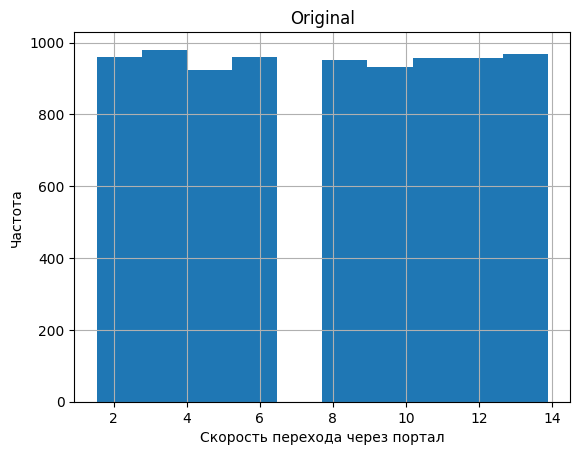

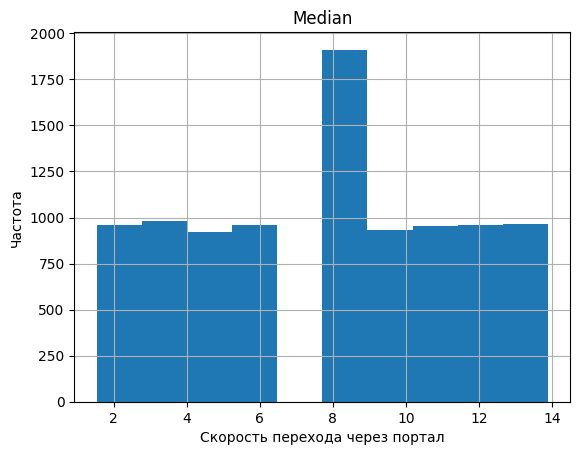

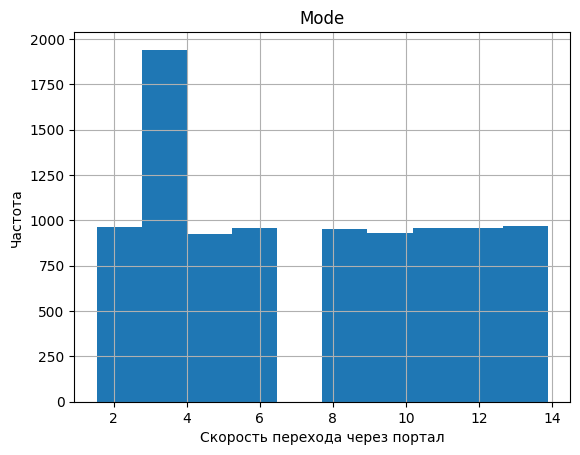

In [608]:
import matplotlib.pyplot as plt

datasets = {
    "Original": X_train,
    "Median": X_train_median,
    "Mode": X_train_moda
}

for name, df in datasets.items():
    plt.figure()
    df["Скорость перехода через портал"].hist()
    plt.title(name)
    plt.xlabel("Скорость перехода через портал")
    plt.ylabel("Частота")
    plt.show()

Разница значений минимальна, но у моды значение ниже. Общее значение примерно `0.03`, что выше нормального значения (0.01 и ниже), но всё ещё допустимо, хотя на графике сильно разница распределений ярко выражена.

В дальнейшем можно использовать заполнение пропусков по `моде`.

Теперь применим `машинный подход` заполнения пропусков.

In [609]:
X_train = old_X_train.copy()

In [610]:
X_train_KNN = X_train.copy()
X_train_MICE = X_train.copy()
X_train_IterativeImputer = X_train.copy()

In [611]:
def nearest_level(x, levels):
    return levels[np.argmin(np.abs(levels - x))]

Проверим с помощью `KNNImputer` и подгоним под ближайшие дискретные значения, в случае недискретных рещультатов.

In [612]:
from sklearn.impute import KNNImputer

missing_mask = X_train["Скорость перехода через портал"].isna()

num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns

imputer = KNNImputer(n_neighbors=5)
X_train_KNN[num_cols] = imputer.fit_transform(X_train[num_cols])

X_train_KNN.loc[missing_mask, "Скорость перехода через портал"] = X_train_KNN.loc[missing_mask, "Скорость перехода через портал"].apply(
    lambda x: nearest_level(x, speed_levels)
)

Теперь попробуем заполнить пропуски с помощью `IterativeImputer` и сразу подгоним под ближайшие дискретные значения.

In [613]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

col = "Скорость перехода через портал"

missing_mask = X_train[col].isna()
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
speed_levels = np.sort(X_train[col].dropna().unique())

X_train_iter = X_train.copy()

iter_imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42,
    initial_strategy="median"
)

X_train_IterativeImputer[num_cols] = iter_imputer.fit_transform(X_train[num_cols])

X_train_IterativeImputer.loc[missing_mask, col] = X_train_IterativeImputer.loc[missing_mask, col].apply(
    lambda x: nearest_level(x, speed_levels)
)

Пробуем заполнить пропуски с помощью `MICE` и сразу подгоним под ближайшие дискретные значения.

In [614]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

col = "Скорость перехода через портал"

missing_mask = X_train[col].isna()
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
speed_levels = np.sort(X_train[col].dropna().unique())

m = 5
imputed_values = []

for seed in range(100, 100 + m):
    tmp = X_train.copy()

    mice_imputer = IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=seed,
        initial_strategy="median",
        sample_posterior=True
    )

    tmp[num_cols] = mice_imputer.fit_transform(X_train[num_cols])

    imputed_values.append(tmp.loc[missing_mask, col].to_numpy())

imputed_values = np.vstack(imputed_values)               
final_fill = np.median(imputed_values, axis=0)        

X_train_MICE = X_train.copy()
X_train_MICE[num_cols] = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42,
    initial_strategy="median"
).fit_transform(X_train[num_cols])

X_train_MICE.loc[missing_mask, col] = final_fill

X_train_MICE.loc[missing_mask, col] = X_train_MICE.loc[missing_mask, col].apply(
    lambda x: nearest_level(x, speed_levels)
)

In [615]:
X_train_KNN["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

In [616]:
X_train_IterativeImputer["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

In [617]:
X_train_MICE["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

Все 3 метода выдают одинаковый результат, но скорость обработки у IterativeImputer выше.

In [618]:
p_IterativeImputer = get_distribution(
    X_train_IterativeImputer['Скорость перехода через портал'],
    allowed_values
)

In [619]:
kl_IterativeImputer = entropy(p_original, p_IterativeImputer)

kl_IterativeImputer, kl_median, kl_mode

(np.float64(4.8974673739123975e-05),
 np.float64(0.028761835031905783),
 np.float64(0.02809051781656654))

У машинного подхода KL-дивергенция сильно ниже, поэтому будем использовать его.

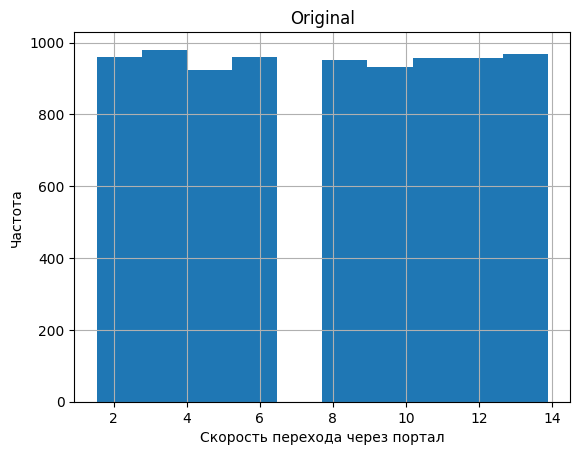

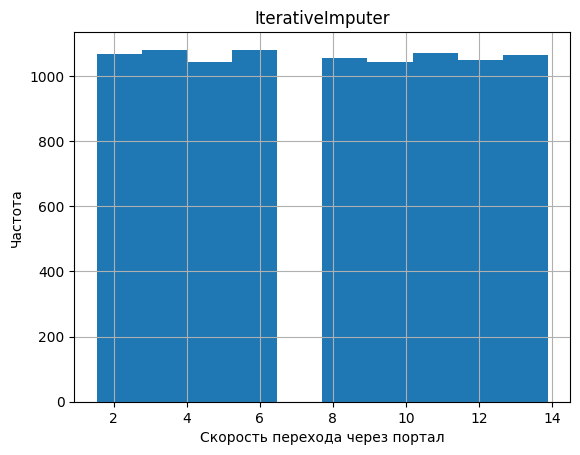

In [620]:
import matplotlib.pyplot as plt

datasets = {
    "Original": X_train,
    "IterativeImputer": X_train_IterativeImputer,
}

for name, df in datasets.items():
    plt.figure()
    df["Скорость перехода через портал"].hist()
    plt.title(name)
    plt.xlabel("Скорость перехода через портал")
    plt.ylabel("Частота")
    plt.show()

KL-дивергенция сильно ниже чем у медианы и моды, значит для заполнению пропусков рационально использовать `IterativeImputer`.

In [621]:
X_train = X_train_IterativeImputer.copy()

In [622]:
X_test["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     241
3.08664     219
4.62996     250
6.17328     221
7.71660     250
9.25992     255
10.80324    230
12.34656    247
13.88988    232
Name: count, dtype: int64

In [623]:
col = "Скорость перехода через портал"

missing_mask_test = X_test[col].isna()


X_test[num_cols] = iter_imputer.transform(X_test[num_cols])

X_test.loc[missing_mask_test, col] = (
    X_test.loc[missing_mask_test, col]
    .apply(lambda x: nearest_level(x, speed_levels))
)

X_test["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     259
3.08664     246
4.62996     285
6.17328     246
7.71660     272
9.25992     283
10.80324    255
12.34656    278
13.88988    263
Name: count, dtype: int64

Вспомним про дискретность признака `Скорость перехода через портал` и далее сравним 2 модели:

- Оставить как есть
- One-Hot кодирование

In [624]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder


# values = list(map(lambda x: round(x, 4), sorted(X_train["Скорость перехода через портал"].unique())))

# encoder = OneHotEncoder(
#     categories=[values],
#     handle_unknown="ignore",
#     drop="first",
#     sparse_output=False
# )

# X_ohe = encoder.fit_transform(
#     X_train[["Скорость перехода через портал"]]
# )

# feature_names = encoder.get_feature_names_out(
#     ["Скорость перехода через портал"]
# )

# X_ohe = pd.DataFrame(
#     X_ohe,
#     columns=feature_names,
#     index=X_train.index
# )

# X_train = pd.concat(
#     [X_train.drop(columns=["Скорость перехода через портал"]), X_ohe],
#     axis=1
# )

In [625]:
X_train.head(20)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,7.71660,21634.909,201.516309,8497.497,175.278,175.278,704.972,2.078,11.004,24.951,0.494,0.965,2.0
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,1.184,6.450,26.222,0.194,0.975,0.0
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,2.980,15.730,44.789,0.887,0.976,3.0
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,1.322,7.078,0.000,0.278,0.982,0.0
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,3.566,18.180,59.577,1.179,0.964,3.0
4963,5.140,7.71660,21630.599,201.513796,8479.072,175.272,175.272,715.290,2.084,11.171,25.585,0.506,0.971,2.0
4091,6.175,9.25992,29791.466,241.633505,8822.265,246.201,246.201,778.048,2.504,13.224,34.448,0.682,0.967,2.0
6489,1.138,1.54332,3346.542,148.184423,6712.135,11.322,11.322,529.705,1.221,6.532,0.000,0.162,0.977,0.0
1379,3.144,4.62996,8380.957,145.222005,7159.710,60.377,60.377,585.006,1.387,7.410,12.226,0.242,0.955,1.0
9440,9.300,13.88988,72763.303,372.841912,9738.873,644.962,644.962,1063.563,4.538,22.854,88.590,1.754,0.990,3.0


# Лабораторная работа 4

In [626]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

Используем "Ящики с усами" для поиска выбросов

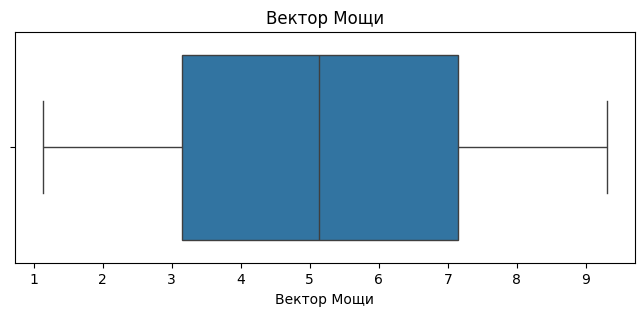

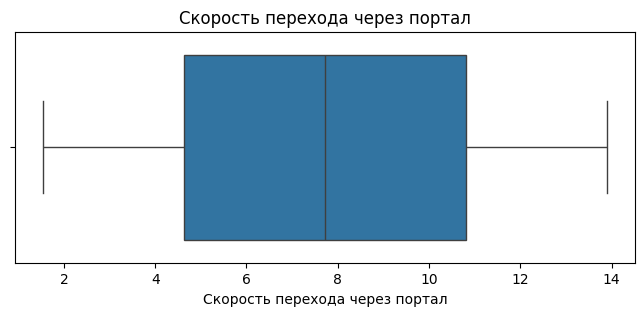

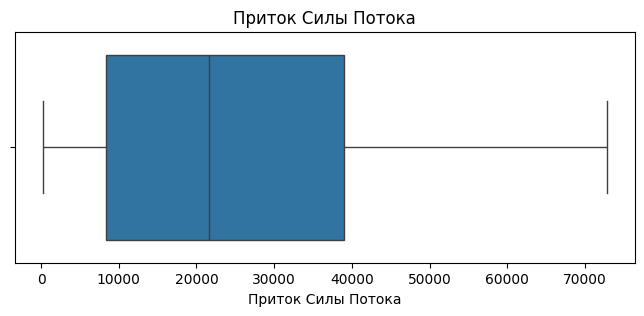

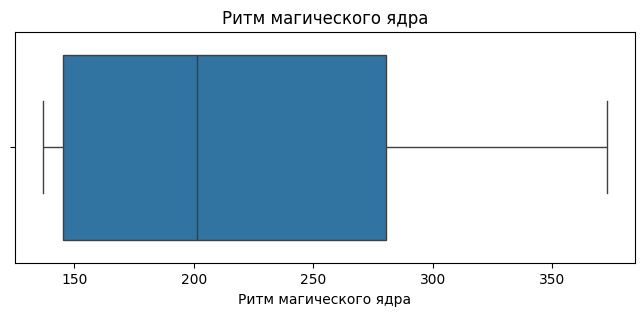

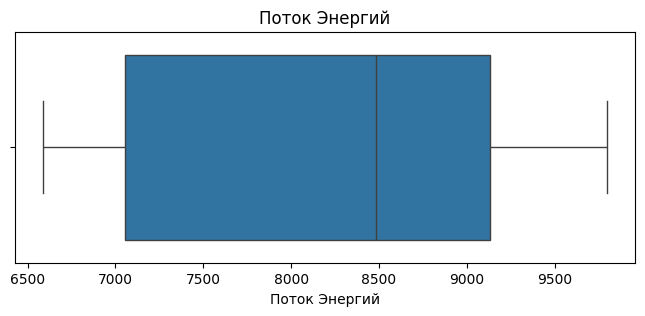

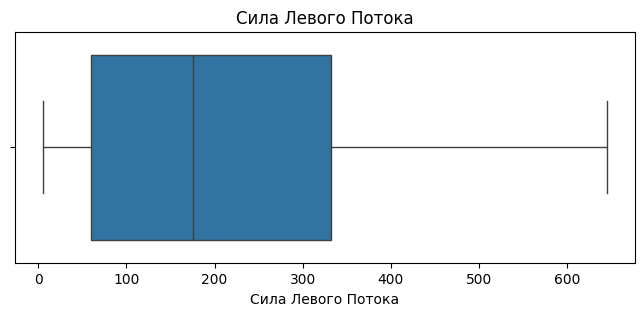

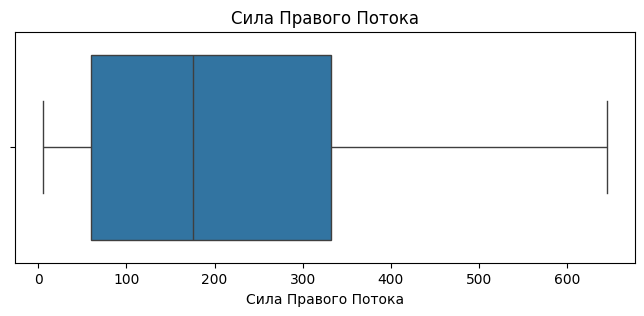

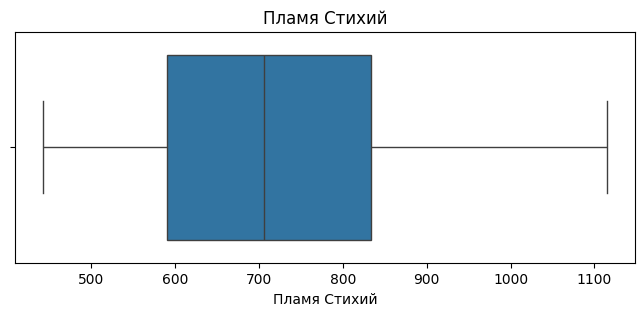

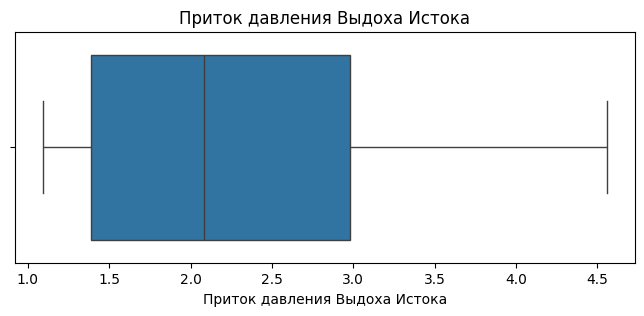

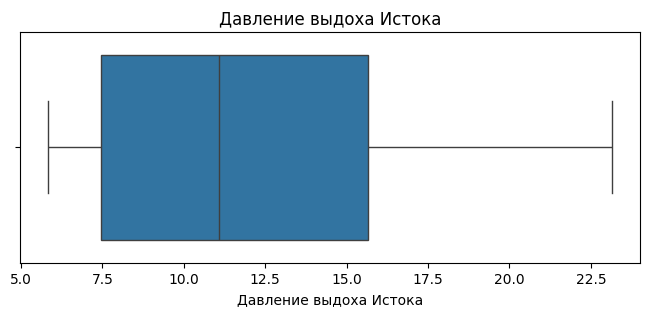

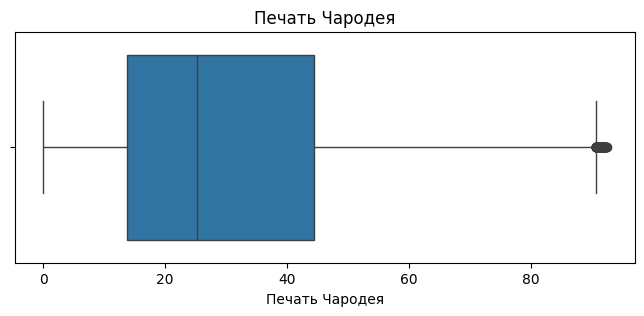

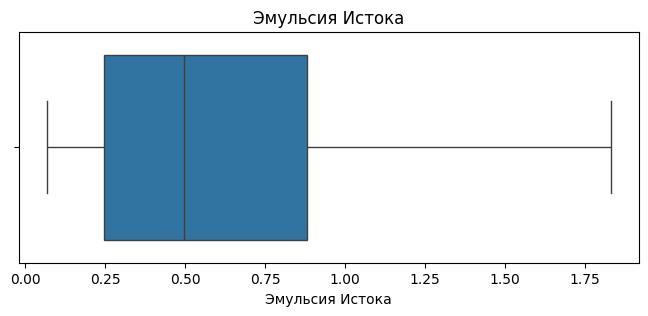

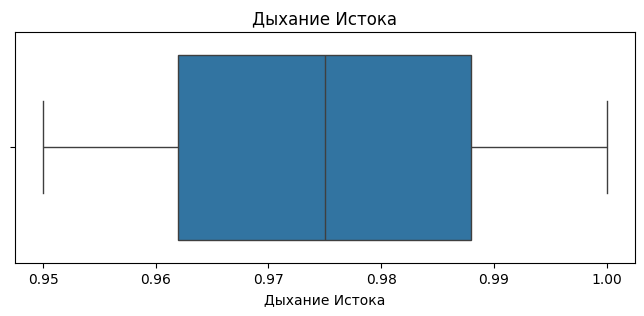

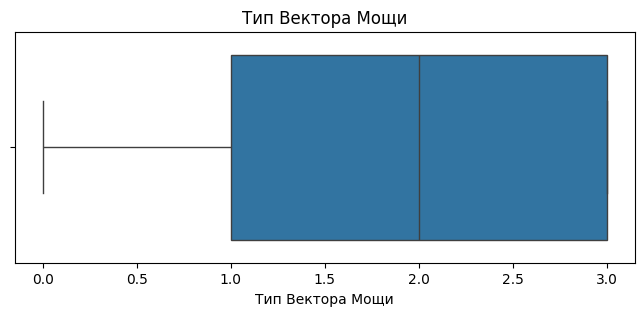

In [627]:
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.show()

Из всех графиков выделяется только `Печать чародея`.

Спрва от графика выидны потенциальные выбросы.

In [628]:
def iqr_outliers_mask(s: pd.Series, k: float = 1.5) -> pd.Series:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return (s < low) | (s > high)


def robust_z_outliers_mask(s: pd.Series, thr: float = 3.5) -> pd.Series:
    med = s.median()
    mad = (s - med).abs().median()
    if mad == 0:
        return pd.Series(False, index=s.index)
    rz = 0.6745 * (s - med) / mad
    return rz.abs() > thr

In [629]:
potencial_cols = ["Печать Чародея"]

outlier_idx_by_col = {}
outlier_idx_all = set()

for col in potencial_cols:
    s = X_train[col]

    mask_iqr = iqr_outliers_mask(s, k=1.5)
    mask_rz = robust_z_outliers_mask(s, thr=3.5)

    print(f"{col}: IQR={len(set(s.index[mask_iqr]))} RZ={len(set(s.index[mask_rz]))}")

    mask_both = mask_iqr & mask_rz
    idx_col = set(s.index[mask_both])

    outlier_idx_by_col[col] = idx_col
    outlier_idx_all |= idx_col

len(outlier_idx_all)

Печать Чародея: IQR=186 RZ=0


0

По итогам работы IQR и Robust Z-score выбросы в `Печать Чародея` не были найдены.

При этом IQR нашёл 186, а Robust не нашёл вовсе.

In [630]:
X_train["Печать Чародея"].describe()

count    9547.00000
mean       33.59335
std        25.85155
min         0.00000
25%        13.75650
50%        25.24200
75%        44.52950
max        92.47600
Name: Печать Чародея, dtype: float64

Попробуем разобраться почему так вышло.

Q1 = 13.76

Q3 = 44.53

IQR = Q3 - Q1 = 30.77

high = Q3 + 1.5 * IQR = 90.68

Верхняя граница совсем немного ниже максимального значения.

Попробуем посмотреть подробнее на графике.

In [631]:
X_train.corr(numeric_only=True)[
    "Печать Чародея"].sort_values(ascending=False)

Печать Чародея                    1.000000
Эмульсия Истока                   0.985423
Приток Силы Потока                0.977598
Сила Правого Потока               0.977143
Сила Левого Потока                0.977143
Приток давления Выдоха Истока     0.975443
Давление выдоха Истока            0.971826
Пламя Стихий                      0.969587
Ритм магического ядра             0.962105
Вектор Мощи                       0.912956
Скорость перехода через портал    0.909324
Поток Энергий                     0.878793
Тип Вектора Мощи                  0.833060
Дыхание Истока                   -0.036798
Name: Печать Чародея, dtype: float64

Посмотрим на связи с признаками с высокой коррелляцией.

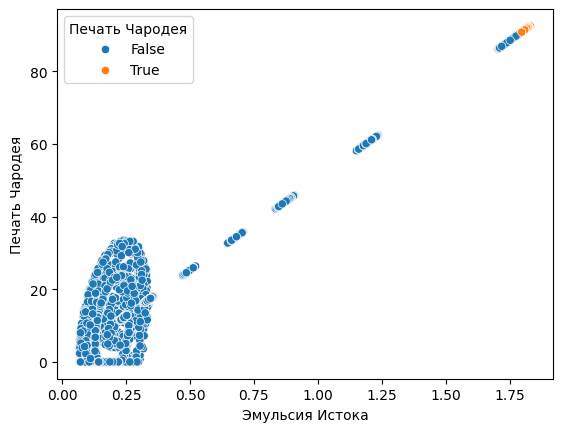

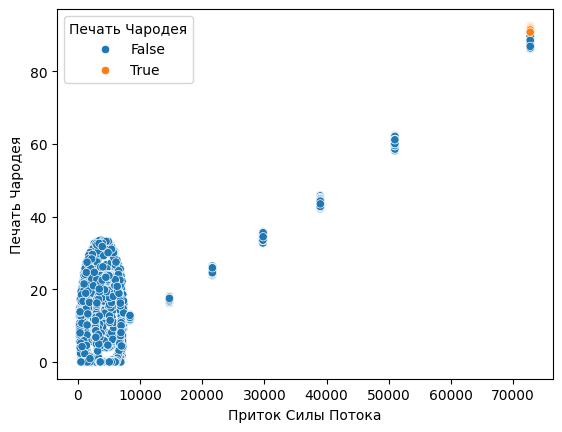

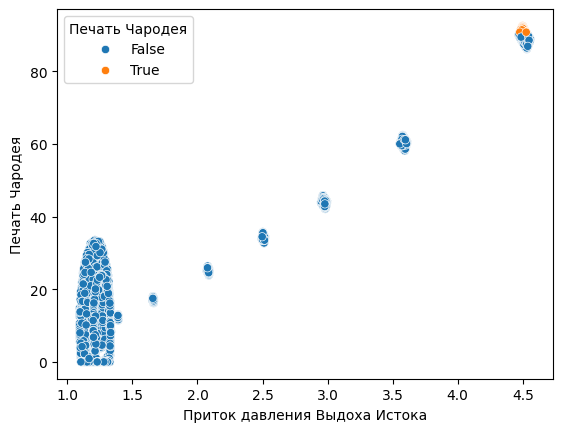

In [632]:
corrs = ["Эмульсия Истока", "Приток Силы Потока", "Приток давления Выдоха Истока"]

s = X_train["Печать Чародея"]

q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
high = q3 + 1.5 * iqr

outliers_mask = (X_train["Печать Чародея"] > high)

for col in corrs:
    sns.scatterplot(x=X_train[col], y=X_train["Печать Чародея"], hue=outliers_mask)
    plt.show()

По графикам видно, что значения выше high не являются выбросами, т.к. принадлежат некоторой "кучке" нормальных значений.

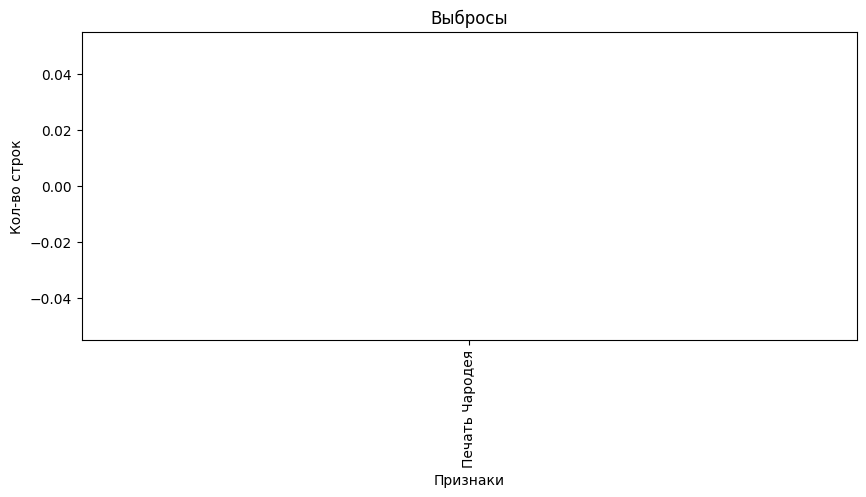

Строк с выбросами: 0


In [633]:
counts = pd.Series({col: len(
    idxs) for col, idxs in outlier_idx_by_col.items()}).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.title("Выбросы")
plt.ylabel("Кол-во строк")
plt.xlabel("Признаки")
plt.show()

print("Строк с выбросами:",
      len(outlier_idx_all))

In [634]:
X_train_no_outliers = X_train.drop(
    index=list(outlier_idx_all), errors="ignore")
print("Было:", len(X_train), "Стало после удаления выбросов:",
      len(X_train_no_outliers))

Было: 9547 Стало после удаления выбросов: 9547


In [635]:
X_train = X_train_no_outliers.copy()

Проверим выборку на наличие аномалий.

In [636]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF

In [637]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

In [638]:
def plot_anoms_2d(X2d, is_anom, title):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=X2d[:, 0], y=X2d[:, 1], hue=is_anom, s=25)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Anomaly", loc="best")
    plt.show()

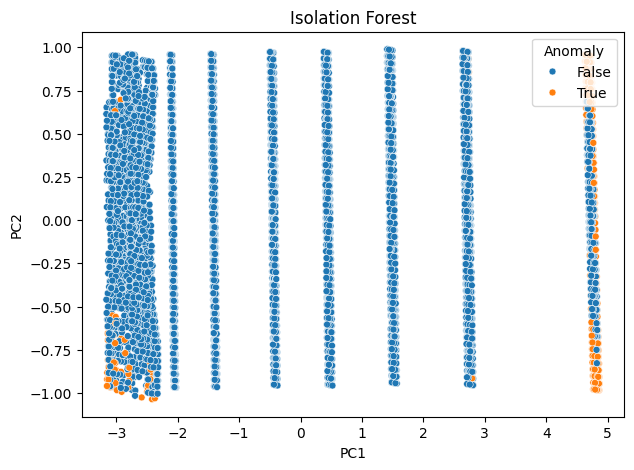

In [ ]:
m_if = IForest(contamination=0.02, random_state=42)
m_if.fit(X_scaled)
labels_if = m_if.labels_
is_if_anom = (labels_if == 1)
idx_if = set(X_train.index[is_if_anom])

plot_anoms_2d(X_2d, is_if_anom, "Isolation Forest")

Аномалии, предложенные Isolation Forest маловероятно являются аномалиями, т.к. находятся в общей куче значений.

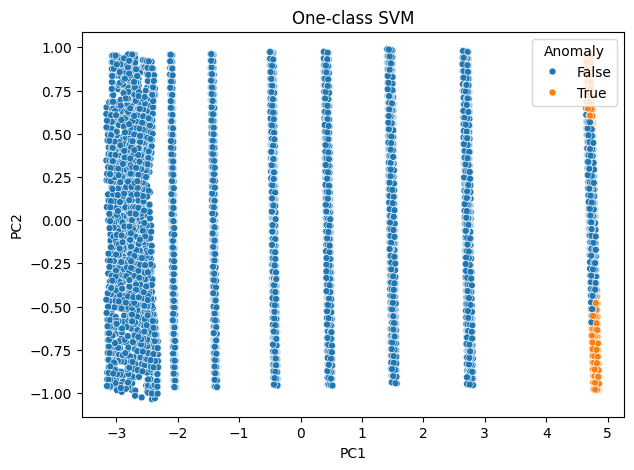

In [ ]:
m_sv = OCSVM(contamination=0.02, kernel="rbf", gamma="scale")
m_sv.fit(X_scaled)
labels_sv = m_sv.labels_
is_sv_anom = (labels_sv == 1)
idx_sv = set(X_train.index[is_sv_anom])


plot_anoms_2d(X_2d, is_sv_anom, "One-class SVM")

Аномалии на графике One-class SVM тоже трудно назвать иномалиями, т.к. предложенные значения являются частью большой группы значений.

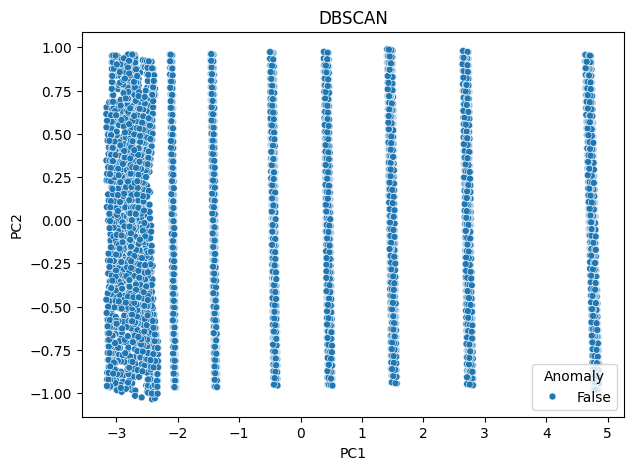

In [641]:
db = DBSCAN(eps=2, min_samples=10)
db_labels = db.fit_predict(X_scaled)
is_db_anom = (db_labels == -1)
idx_db = set(X_train.index[is_db_anom])

plot_anoms_2d(X_2d, is_db_anom, "DBSCAN")

DBSCAN не нашёл аномалий вовсе.

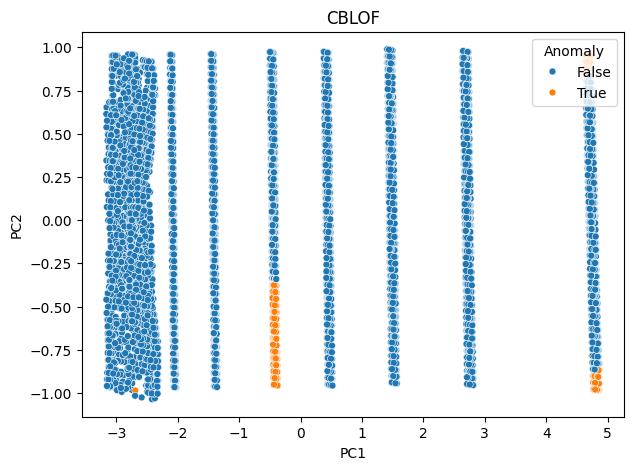

In [ ]:
from pyod.models.cblof import CBLOF

cblof = CBLOF(
    contamination=0.02,
    n_clusters=15,
    alpha=0.9,
    beta=5,
    check_estimator=False,
    random_state=42
)

cblof.fit(X_scaled)

labels_cb = (cblof.labels_ == 1)

idx_cb = set(X_train.index[labels_cb])

plot_anoms_2d(X_2d, labels_cb, "CBLOF")

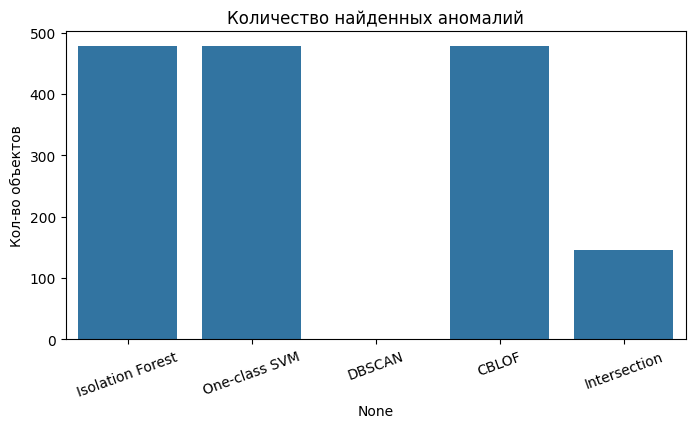

IForest anomalies: 478
OCSVM anomalies: 478
DBSCAN anomalies: 0
CBLOF anomalies: 478
Intersection (all 3): 145


In [643]:
idx_anom_intersection = idx_if & idx_sv & idx_cb

counts_anom = pd.Series({
    "Isolation Forest": len(idx_if),
    "One-class SVM": len(idx_sv),
    "DBSCAN": len(idx_db),
    "CBLOF": len(idx_cb),
    "Intersection": len(idx_anom_intersection)
})

plt.figure(figsize=(8, 4))
sns.barplot(x=counts_anom.index, y=counts_anom.values)
plt.title("Количество найденных аномалий")
plt.ylabel("Кол-во объектов")
plt.xticks(rotation=20)
plt.show()

print("IForest anomalies:", len(idx_if))
print("OCSVM anomalies:", len(idx_sv))
print("DBSCAN anomalies:", len(idx_db))
print("CBLOF anomalies:", len(idx_cb))
print("Intersection (all 3):", len(idx_anom_intersection))

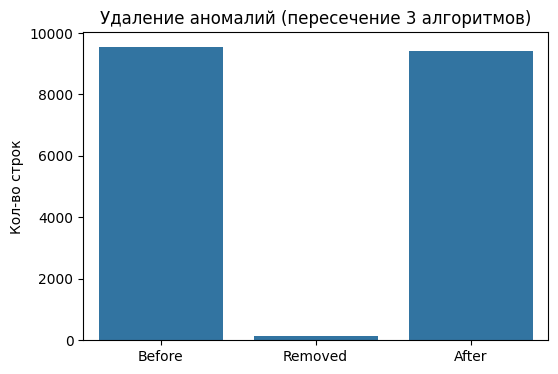

Было: 9547
Удалено аномалий: 145
Стало после удаления аномалий: 9402


In [644]:
X_train_final = X_train.drop(
    index=list(idx_anom_intersection), errors="ignore")

removed = len(idx_anom_intersection)
kept_before = len(X_train)
kept_after = len(X_train_final)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Before", "Removed", "After"], y=[
            kept_before, removed, kept_after])
plt.title("Удаление аномалий (пересечение 3 алгоритмов)")
plt.ylabel("Кол-во строк")
plt.show()

print("Было:", kept_before)
print("Удалено аномалий:", removed)
print("Стало после удаления аномалий:", kept_after)

In [645]:
X_train = X_train_final.copy()